# Netflix Data Cleaning and Visualization

<font size="3.5">**About this Dataset:** Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.</font>

<font size="3.5">These are the questions we want to find answers to:<font>

- <font size="3.5">**Are there more TV shows or movies ulpoaded on the platform?**<font>
- <font size="3.5">**Which is the shortest and longest movie? Which is the TV show with more seasons?**<font>
- <font size="3.5">**How is the distribution of movies and TV shows added to the platform over the years?**<font>
- <font size="3.5">**Which is the day in which more TV shows/movies were uploaded?**<font>
- <font size="3.5">**Which is the majority genre of TV shows and movies?**<font>
- <font size="3.5">**Who is the director with most movies/TV shows on the platform?**<font>
- <font size="3.5">**What is the country that has produced more TV shows/movies?**<font>

<font size="3.5">Remember that we should always start by setting the objectives of the analysis.<font>

<font size="3.5">Since the dataset is from Kaggle we are going to use the Kaggle API to download the dataset.<font>

<font size="3.5">First we need to import the libraries.<font>

In [1]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [2]:
od.download("https://www.kaggle.com/datasets/shivamb/netflix-shows")

Skipping, found downloaded files in "./netflix-shows" (use force=True to force download)


<font size="3.5">Now that our dataset was downloaded we are going to read it and store it as a dataframe.<font>

In [3]:
df = pd.read_csv('netflix-shows/netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.duplicated().sum()

0

<font size="3.5">We can see that there are 12 columns. According to the dataset information:<font>

- <font size="3.5">**show_id**: Unique ID for every movie / TV show<font>
- <font size="3.5">**type**: Identifier (movie or TV show)<font>
- <font size="3.5">**title**: Title<font>
- <font size="3.5">**director**: Director<font>
- <font size="3.5">**cast**: Actors involved<font>
- <font size="3.5">**country**: Country where the movie / TV show was produced<font>
- <font size="3.5">**data_added**: Date it was added on Netflix<font>
- <font size="3.5">**release_year**: Actual release year<font>
- <font size="3.5">**rating**: TV rating<font>
- <font size="3.5">**duration**: Total duration in minutes or number of seasons<font>
- <font size="3.5">**listed_in**: Genre of the movie / TV show<font>
- <font size="3.5">**description**: The summary description<font>

<font size="3.5">Also we can see that we have null values in a few columns, but there are no duplicated rows. Let's take a closer look of each column:<font>

<font size="4">**type:**</font>

   <font size="3.5">We can observe that this column doesn't have null values, but we are going to make sure that there are only two different values: Movie or TV Show.</font>

In [8]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

<font size="4">**rating:**</font>

   <font size="3.5">First we are going to analyze what are the values of rating that appears in the dataset.<font>

In [9]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

<font size="3.5">We see that there are 3 values that appear to correspond to the duration of the film/TV show instead of being a rating. We are going to select these three rows to check if the values of the duration column are null values.<font>

In [10]:
df.loc[(df['rating'] == '74 min')|(df['rating'] == '84 min')|(df['rating'] == '66 min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


<font size="3.5">We are going to move those values from rating column to duration column and fill the ones of the rating column as NR (no rated).<font>

In [11]:
x = ['74 min', '84 min', '66 min']
for n in x:
    df.loc[ df['rating'] == n, 'duration'] = n
    df.loc[ df['rating'] == n, 'rating'] = 'NR'
        

In [12]:
df.loc[[5541, 5794, 5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NR,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NR,66 min,Movies,The comic puts his trademark hilarious/thought...


In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

<font size="3.5">Refering to the rating column again, we can find the description of the different rating values on the Netflix website. There we can observe that NR (no rated) and UR (unrated) means the same. So we are going to replace UR and nan values with NR.<font>

In [14]:
df['rating'].replace(['UR', np.nan], 'NR', inplace = True)

In [15]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV'], dtype=object)

<font size="4">**diration:**</font>

   <font size="3.5">After we replace the values we shouldn't have nan values anymore. Let's check that out.<font>

In [16]:
df['duration'].isnull().sum()

0

<font size="3.5">Later, we are going to analyze this column values in depth.

<font size="4">**release_year:**

   <font size="3.5">In this column we're going to check if all the values correspond to years values.

In [17]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [18]:
print('min year:', df['release_year'].min(), 'max year:', df['release_year'].max())

min year: 1925 max year: 2021


<font size="4">**date_added:**

   <font size="3.5">First, we are going to change the format of the values on the column. We know that the values are written as 'September 21,2021', so we need to transform it to a date format.

In [19]:
df.loc[df['date_added'].isnull() == False]['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8797, dtype: object

In [20]:
df['date_added'] = df['date_added'].str.replace(' ', '')

In [21]:
df['date_added'] = pd.to_datetime(df.loc[df['date_added'].isnull() == False]['date_added'], format = '%B%d,%Y')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


<font size="4">**director, cast and country:**
    
<font size="3.5"> With this 3 columns we have 3 options. Option 1 is to drop all null values, option 2 is to replace the null values (in this case we can replace them with unkown) and the third option is research and try to find that missing values (because in this case we know that these missing values are because the information is incomplete and not because the value doesn't exist). You can find another dataset with movie/TV show title, cast, director and country or try to scrap a web to optain that information. For this case, I'm going to replace those null values with unknown, but this decision should be made taking into account the goals set at the beggining.

In [23]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country']. fillna('Unknown')

<font size="4">**description:**

   <font size="3.5">We are going to drop this column because we are not going to need it.

In [24]:
df.drop('description', axis = 1, inplace = True)

<font size="4">**listed_in:**

   <font size="3.5">For now, we are going to change the column name to genre.

In [25]:
df = df.rename(columns={'listed_in': 'genre'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  genre         8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 757.0+ KB


<font size="3.5">Now that we have cleaned our data, we can start answering our questions.

**1 - <font size="3.5">TV shows vs movies:** 
    
<font size="3.5">First we are going to answer the most simple question: <font size="3.5">**There are more TV shows or more Movies on the Netflix platform?**</font>

In [27]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [28]:
TV_shows = df.loc[df['type'] == 'TV Show']
movies = df.loc[df['type'] == 'Movie']

In [29]:
print('proportion TV_shows:' ,(TV_shows['type'].count()/df['type'].count()), 'proportion movies:' ,(movies['type'].count()/df['type'].count()))

proportion TV_shows: 0.3038492108550017 proportion movies: 0.6961507891449983


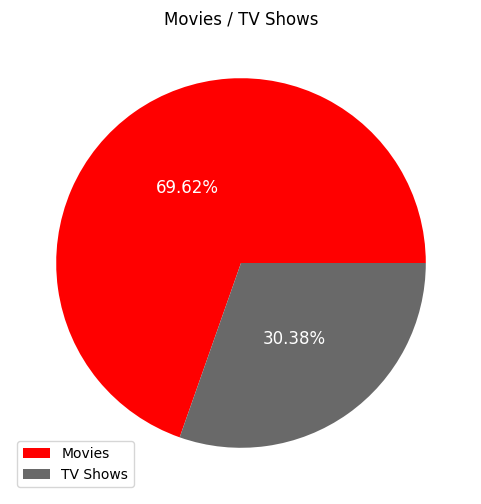

In [30]:
fig, ax = plt.subplots(figsize = (6,6))
plt.pie(df['type'].value_counts(), data = df, colors = ['red', 'dimgrey'], autopct = '%1.2f%%', pctdistance = 0.5, textprops={'color':"w", 'fontsize': 12})
ax.set_title('Movies / TV Shows')
ax.legend(['Movies', 'TV Shows'])

<font size="3.5">So, the biggest proportion of content programmes are movies with a 69,62%.

**2 - <font size="3.5">What was the shortest movie? and the longest? What is the TV show with the most seasons?**

<font size="3.5">First we are going to analyze movies duration. Let's graph the values:

In [31]:
movies['duration'] = movies['duration'].str.split().str[0]
movies['duration'] = movies['duration'].astype(int)

/tmp/ipykernel_8817/337897013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.split().str[0]
/tmp/ipykernel_8817/337897013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].astype(int)


In [32]:
movies = movies.rename(columns={'duration': 'duration_min'})

In [33]:
movies['duration_min'].describe()

count    6131.000000
mean       99.564998
std        28.289504
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64

<AxesSubplot: xlabel='Count', ylabel='duration_min'>

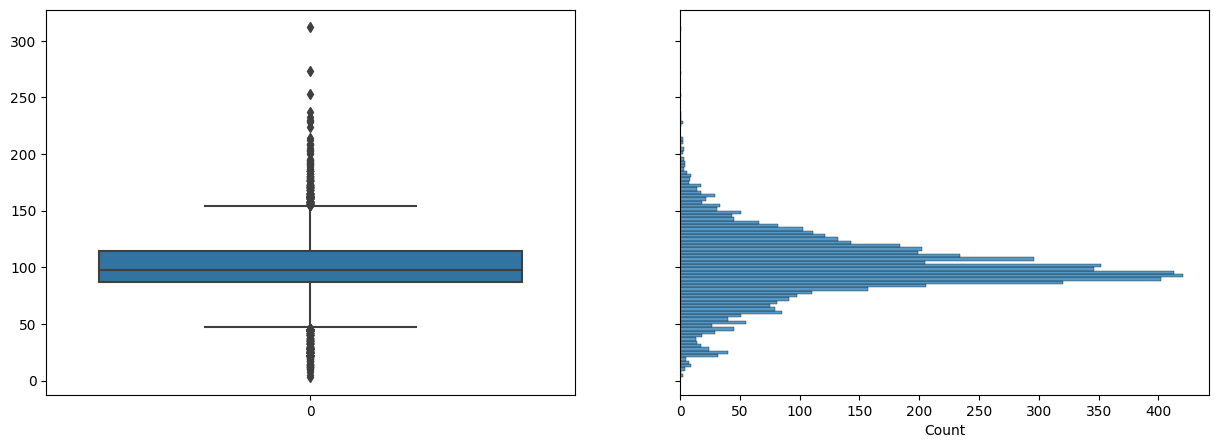

In [34]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.boxplot(movies['duration_min'], ax = ax1)
sns.histplot(y = movies['duration_min'], ax = ax2)

<font size="3.5">We see a lot of outliers, but here it doesn't means that those values are wrong. We can find what is the most long and most short movie and check if that information is correct.

In [35]:
movies.loc[movies['duration_min'] == movies['duration_min'].min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_min,genre
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",Unknown,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy"


<font size="3.5">After googled the movie, its lenght is actually 3 minutes, so the value is correct. Now let's do the same with the longest one.

In [36]:
movies.loc[movies['duration_min'] == movies['duration_min'].max()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_min,genre
4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy"


<font size="3.5">After checking this, we found out that this movie is extremely long because it gives the viewer the opportunity to choose how the story continues.

<font size="3.5">Now we can do the same with TV shows (note that the duration of TV shows is measure in seasons).

In [37]:
TV_shows['duration']

1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
5        1 Season
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800     1 Season
8803    2 Seasons
Name: duration, Length: 2676, dtype: object

In [38]:
TV_shows['duration'] = TV_shows['duration'].str.split().str[0]
TV_shows['duration'] = TV_shows['duration'].astype(int)

/tmp/ipykernel_8817/445367307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_shows['duration'] = TV_shows['duration'].str.split().str[0]
/tmp/ipykernel_8817/445367307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_shows['duration'] = TV_shows['duration'].astype(int)


In [39]:
TV_shows = TV_shows.rename(columns={'duration': 'duration_seasons'})

In [40]:
TV_shows['duration_seasons'].describe()

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_seasons, dtype: float64

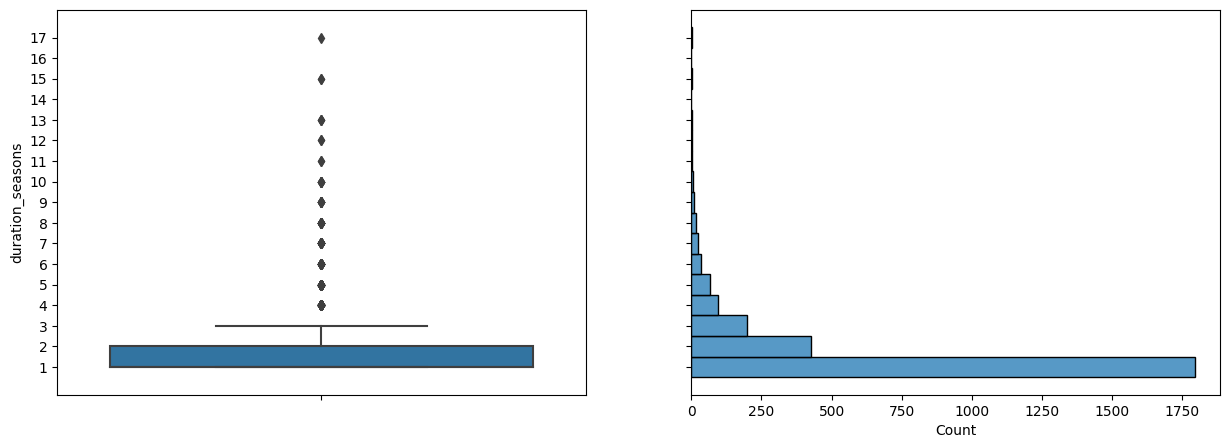

In [41]:
fig2, (ax3, ax4) = plt.subplots(1,2, figsize=(15, 5), sharey = True)
sns.boxplot(y = TV_shows['duration_seasons'], ax = ax3)
sns.histplot(y = TV_shows['duration_seasons'], discrete=True, ax = ax4)
ax3.set_yticks(list(range(1,18)))

<font size="3.5">We can observe that most of the TV shows have only 1 season. Also we can find out which is the TV show with most seasons (17 seasons).

In [42]:
TV_shows.loc[TV_shows['duration_seasons'] == TV_shows['duration_seasons'].max()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre
548,s549,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17,"Romantic TV Shows, TV Dramas"


**3 - <font size="3.5">Has there been a difference between the number of TV shows and movies added over the years?**

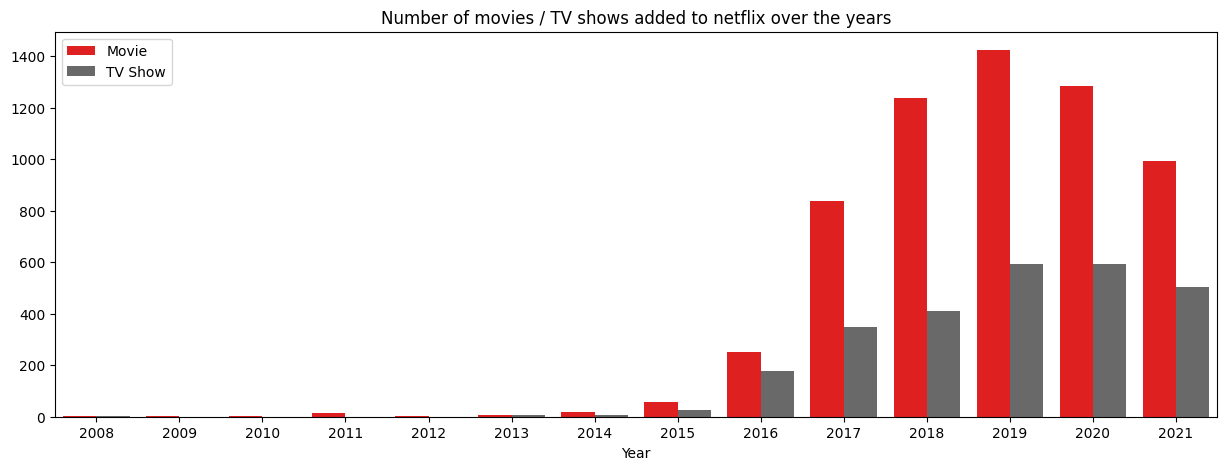

In [43]:
df_date_added = df.loc[df['date_added'].isnull() == False]
fig3, ax5 = plt.subplots(figsize=(15, 5))
sns.countplot(data = df_date_added, x= df_date_added['date_added'].dt.year.astype(int), hue = df_date_added['type'], palette=['red',"dimgrey"], ax=ax5)
ax5.set_title('Number of movies / TV shows added to netflix over the years')
ax5.set_ylabel(None)
ax5.set_xlabel('Year')
ax5.legend(loc = 'upper left')

<font size="3.5">We can see that the amount of both grew up a lot in the past few years, but the number of movies where always greater

**4- <font size="3.5">What was the day with more movies / TV shows added? Is there a particular day of the year where Netflix add more content? And of the month? And of the week?**

In [44]:
df['date_added'].value_counts().head(10)

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
2019-10-01     62
2018-11-01     60
2021-07-01     60
2021-09-01     56
2018-01-01     55
Name: date_added, dtype: int64

<font size="3.5">We see that the day with most content added with a total of 110 was the first day of January of 2020. We can also observe if there is a particular day during the year in which most content it was uploaded.

In [45]:
df_date_added['date_added'].dt.dayofyear.astype(int).value_counts().head(10)

1      304
274    202
182    200
305    190
244    153
213    148
91     146
60     138
365    128
121    123
Name: date_added, dtype: int64

<font size="3.5"> We can notice that the first day of the year is the day with the most content uploaded, with almost a 50% more content uploaded compared to the second day of most content uploaded. Now, let's do the same with the day of the month.

In [46]:
df_date_added['date_added'].dt.day.astype(int).value_counts()

1     2212
15     687
2      325
16     289
31     274
20     249
19     243
5      231
22     230
10     214
30     210
6      210
18     207
26     206
8      201
14     198
25     197
27     195
7      194
21     193
28     190
23     184
12     181
17     180
4      175
13     175
24     159
3      151
11     149
9      147
29     141
Name: date_added, dtype: int64

In [47]:
df_date_added['date_added'].dt.day.astype(int).value_counts() / df_date_added['date_added'].count()*100

1     25.144936
15     7.809481
2      3.694441
16     3.285211
31     3.114698
20     2.830510
19     2.762305
5      2.625895
22     2.614528
10     2.432647
30     2.387177
6      2.387177
18     2.353075
26     2.341707
8      2.284870
14     2.250767
25     2.239400
27     2.216665
7      2.205297
21     2.193930
28     2.159827
23     2.091622
12     2.057520
17     2.046152
4      1.989315
13     1.989315
24     1.807434
3      1.716494
11     1.693759
9      1.671024
29     1.602819
Name: date_added, dtype: float64

<font size="3.5">We can see that the first day of the month is the day where more content is added (around of the 25% of the montly content). Let's graph that:

Text(0.5, 0, '')

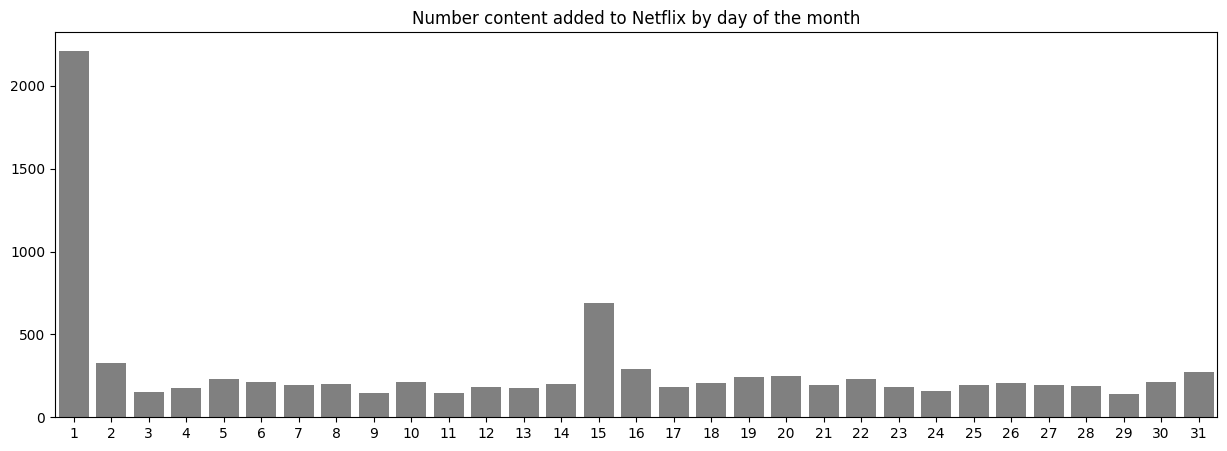

In [48]:
fig5, ax7 = plt.subplots(figsize=(15, 5))
sns.countplot(data = df_date_added, x = df_date_added['date_added'].dt.day.astype(int), color = 'grey', ax = ax7)
ax7.set_title('Number content added to Netflix by day of the month')
ax7.set_ylabel(None)
ax7.set_xlabel(None)

<font size="3.5">Lastly, we can find out what is the day of the week in which Netflix have uploaded more content.

In [49]:
df_date_added['date_added'].dt.dayofweek.astype(int).value_counts().sort_index()

0     851
1    1197
2    1288
3    1396
4    2498
5     816
6     751
Name: date_added, dtype: int64

<font size="3.5">Where 0 correspond to Monday and 6 to Sunday.

In [50]:
df_date_added['date_added'].dt.dayofweek.astype(int).value_counts().sort_index() / df_date_added['date_added'].count()*100

0     9.673752
1    13.606911
2    14.641355
3    15.869046
4    28.396044
5     9.275890
6     8.537001
Name: date_added, dtype: float64

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

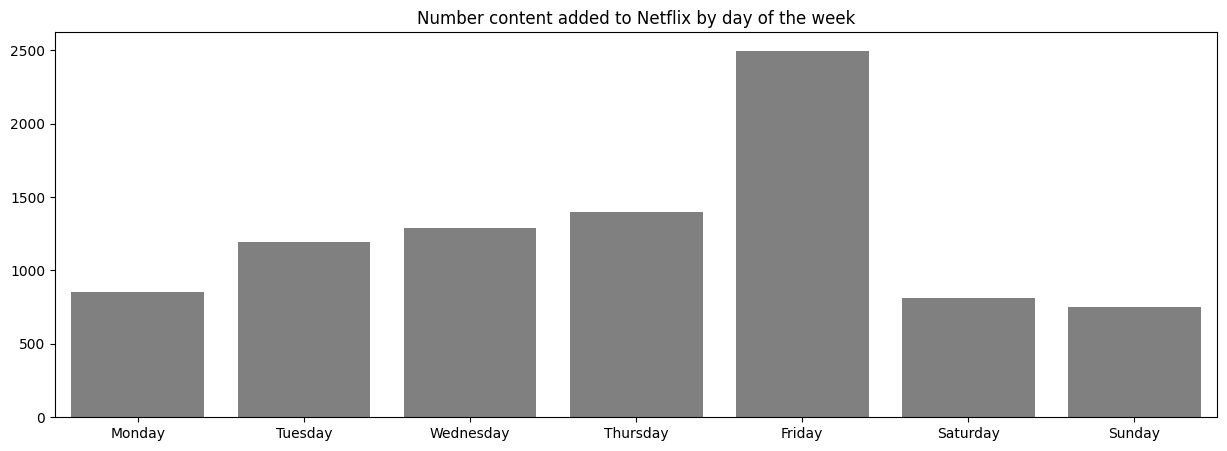

In [51]:
fig6, ax8 = plt.subplots(figsize=(15, 5))
sns.countplot(data = df_date_added, x = df_date_added['date_added'].dt.dayofweek.astype(int), color = 'grey', ax = ax8)
ax8.set_title('Number content added to Netflix by day of the week')
ax8.set_ylabel(None)
ax8.set_xlabel(None)
ax8.set_xticklabels(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])

<font size="3.5">Here we can see that on Friday most content was uploaded (around the 28% of the content of the week). If you think about it, it makes sense because most of the people watch Netflix on the weekends.

**5 - <font size="3.5">What is the genre with the most movies? And the TV show?**

In [52]:
s = TV_shows.genre.str.replace('\.',',').str.strip().str.split(', ', expand=True).stack().value_counts()

/tmp/ipykernel_8817/2076994249.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  s = TV_shows.genre.str.replace('\.',',').str.strip().str.split(', ', expand=True).stack().value_counts()


In [53]:
s

International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
dtype: int64

In [54]:
m = movies.genre.str.replace('\.',',').str.strip().str.split(', ', expand=True).stack().value_counts()

/tmp/ipykernel_8817/4137561827.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  m = movies.genre.str.replace('\.',',').str.strip().str.split(', ', expand=True).stack().value_counts()


In [55]:
m

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
dtype: int64

<font size="3.5">We can see that in both cases International, Dramas and Comedies lead the top 3 of uploaded genres

**6 - <font size="3.5">Which director has more movies / TV shows on the platform?**

In [56]:
df[df['director'] != 'Unknown']['director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

<font size="3.5">The director with most movies is Rajiv Chilaka with 19.

**7 - <font size="3.5">Which country has produced more movies / TV shows?**

In [57]:
df[df['country'] != 'Unknown']['country'].value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [58]:
df[df['country'] != 'Unknown'].groupby('type')['country'].value_counts().head(10)

type   country       
Movie  United States     2058
       India              893
       United Kingdom     206
       Canada             122
       Spain               97
       Egypt               92
       Nigeria             86
       Indonesia           77
       Japan               76
       Turkey              76
Name: country, dtype: int64

<font size="3.5">And again all of them are movies. We have to considerar that this is also because the amount of movies is around 70%